# Ex.16

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA , QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

![ex_16.png](./ex_16.PNG)

In [3]:
boston = load_data('Boston')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [4]:
# Compute the median crime value
med_crim = boston['crim'].median()
# Create a new column indicating whether the crime rate is above the median
boston['Above_medcrim'] = (boston['crim'] > med_crim).astype(int)

In [5]:
# # Computes the median crime values
# med_crim = boston['crim'].median()
# # Selects the crime rate column
# crim = boston['crim']
# # Builds the Above median crime column
# boston['Above_medcrim'] = np.zeros(len(boston))
# # One in the locations in which the entries of the crime column are above the median
# boston.loc[crim[crim > med_crim].index, 'Above_medcrim'] = 1

In [6]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Above_medcrim
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


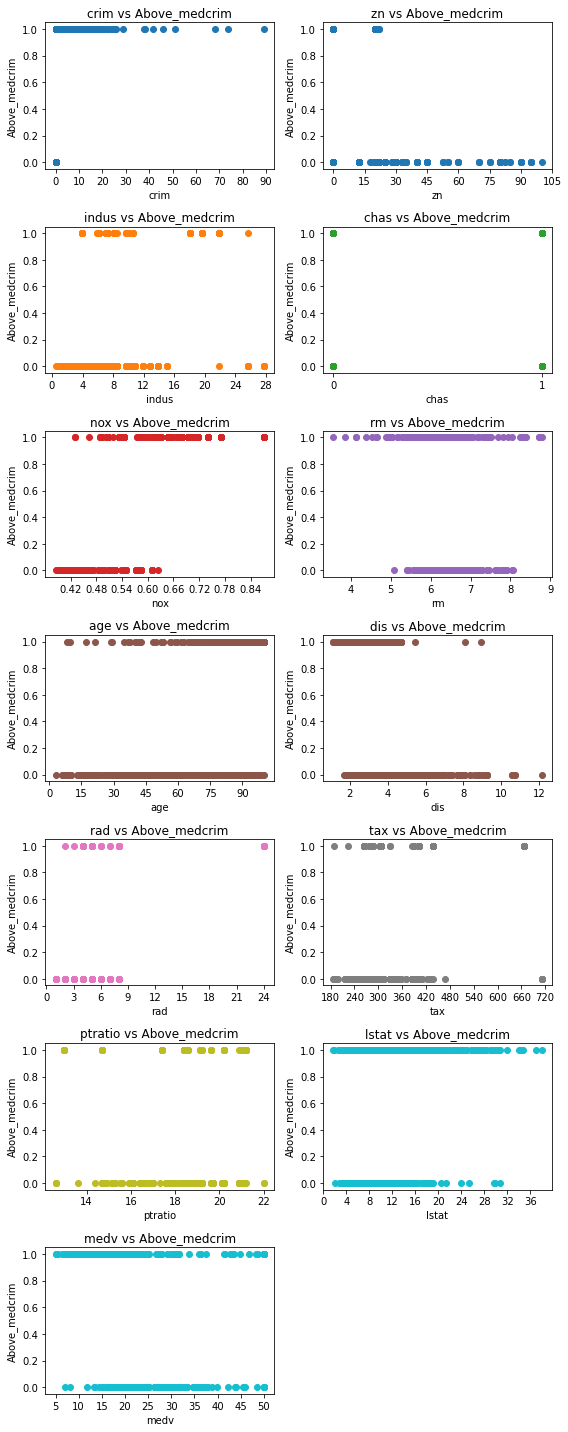

In [7]:
fig, axes = plt.subplots(7, 2, figsize=(8, 20))
axes = axes.flatten()  # Flatten for easy indexing
x = boston.columns.drop('Above_medcrim')
colors = plt.colormaps.get_cmap('tab10').resampled(len(x))


for i, col in enumerate(x):
    ax = axes[i]
    ax.scatter(boston[col], boston['Above_medcrim'], color = colors(i), label=col)
    ax.set_title(f'{col} vs Above_medcrim')
    ax.set_ylabel('Above_medcrim')
    ax.set_xlabel(col)
    #ax.legend()
    #Takes only integers as x tickers
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    
    
# Hide any unused subplots (if you have more axes than plots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    

plt.tight_layout()
plt.show()

In [8]:
# Use all predictors except crim which is strongly related to Above medicrim
allvars = boston.columns.drop(['Above_medcrim', 'crim'])
X = MS(allvars).fit_transform(boston)
y = boston['Above_medcrim']
# Split the dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Scale the data
scaler = StandardScaler()
# computes the mean and standard deviation of each feature in the training set and it applies those statistics to scale X_train
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
# Use the same mean and std from the training set to scale the test set. This avoids data leakage, where information from the test set could improperly influence the model.
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [10]:
X_test, X_train

(     intercept        zn     indus      chas       nox        rm       age  \
 173        0.0 -0.505125 -1.022256 -0.281546 -0.405218  0.125771  0.553831   
 274        0.0  1.266629 -0.681651  3.551814 -0.945403  0.601965 -1.299478   
 491        0.0 -0.505125  2.396785 -0.281546  0.443643 -0.477130  1.085934   
 72         0.0 -0.505125 -0.046624 -0.281546 -1.236931 -0.362955 -2.208034   
 452        0.0 -0.505125  1.005500 -0.281546  1.335376 -0.039923  0.832552   
 ..         ...       ...       ...       ...       ...       ...       ...   
 441        0.0 -0.505125  1.005500 -0.281546  1.566884  0.111847  1.028018   
 23         0.0 -0.505125 -0.431970 -0.281546 -0.165136 -0.713835  1.129371   
 225        0.0 -0.505125 -0.711959 -0.281546 -0.456664  3.340777  0.514014   
 433        0.0 -0.505125  1.005500 -0.281546  1.335376  0.153618  0.691381   
 447        0.0 -0.505125  1.005500 -0.281546  1.566884 -0.103972  1.006299   
 
           dis       rad       tax   ptratio     l

## Benchmark

In [11]:
# The market is assumed to be rising everyday
labels_naive = np.zeros(len(X_test))
confusion_table(labels_naive , y_test)

Truth,0,1
Predicted,,
0,76,76
1,0,0


In [12]:
np.mean(labels_naive == y_test)

0.5

Median value --> exactly half of the neighbourhoods have a crime rate above it

## Logistic

In [13]:
# Performs a Logistic regression with the train dataset
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
log_results = glm.fit()
# Predicted values will be in between 0 and 1 --> probabilities
probs = log_results.predict(X_test)

#Need to convert the continuos predictions into binary values to confront them with Above med crim
y_pred_log = np.zeros(len(X_test))
# If prob is larger than 0.5 the result is predicted to be above the median
y_pred_log[probs>0.5] = 1

summarize(log_results)

,coef,std err,z,P>|z|
intercept,0.0000,0.000,NaN,NaN
zn,-3.6813,0.912,-4.035,0.000
indus,-0.5485,0.332,-1.651,0.099
chas,0.1395,0.221,0.632,0.528
nox,5.4889,1.021,5.377,0.000
rm,0.3555,0.540,0.658,0.510
age,0.2938,0.393,0.747,0.455
dis,1.5404,0.546,2.819,0.005
rad,2.4865,0.721,3.449,0.001
tax,-0.6059,0.500,-1.213,0.225


In [14]:
y_pred_log

array([0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.])

In [15]:
confusion_table(y_pred_log, y_test)

Truth,0,1
Predicted,,
0,71,15
1,5,61


In [16]:
np.mean(y_pred_log == y_test)

0.868421052631579

The accuracy is 86.8%, the probability of correctly predicting a neighborhood to have an above the median crime rate is even higher at (61/66) 92.4%.

## LDA

In [17]:
# Perform an LDA classification on the training set, using the same training and test set as before
lda = LDA(store_covariance=True)
lda.fit(X_train , y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,True
,tol,0.0001
,covariance_estimator,None


In [18]:
y_pred_lda = lda.predict(X_test)
confusion_table(y_pred_lda , y_test)

Truth,0,1
Predicted,,
0,74,23
1,2,53


In [19]:
np.mean(y_pred_lda == y_test)

0.8355263157894737

The accuracy is 83,5%, the probability of correctly predicting a neighborhood to have an above the median crime rate is even higher at (53/55) 96,4%.

## QDA

In [20]:
# Perform an QDA classification on the training set, using the same training and test set as before
qda = QDA(store_covariance=True, reg_param=0.1)
qda.fit(X_train , y_train)

,priors,None
,reg_param,0.1
,store_covariance,True
,tol,0.0001


In [21]:
y_pred_qda = qda.predict(X_test)
confusion_table(y_pred_qda , y_test)

Truth,0,1
Predicted,,
0,72,19
1,4,57


In [22]:
np.mean(y_pred_qda == y_test)

0.8486842105263158

The accuracy is 84.9%, the probability of correctly predicting a neighborhood to have an above the median crime rate is even higher at (57/61) 93.4%.

## Naive Bayes

In [23]:
# Perform a Naive Bayes classification on the training set, using the same training and test set as before
NB = GaussianNB()
NB.fit(X_train , y_train)

,priors,None
,var_smoothing,1e-09


In [24]:
y_pred_NB = NB.predict(X_test)
confusion_table(y_pred_NB , y_test)

Truth,0,1
Predicted,,
0,66,16
1,10,60


In [25]:
np.mean(y_pred_NB == y_test)

0.8289473684210527

The accuracy is 82,9%, the probability of correctly predicting a neighborhood to have an above the median crime rate is even higher at (60/70) 85.7%.

## KNN

In [26]:
# Try KNN with different values of K
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    acc = np.mean(y_test == knn_pred)
    print(f"KNN (K={k}) Score: {acc:.3f}")

KNN (K=1) Score: 0.914
KNN (K=2) Score: 0.914
KNN (K=3) Score: 0.908
KNN (K=4) Score: 0.914
KNN (K=5) Score: 0.901
KNN (K=6) Score: 0.882
KNN (K=7) Score: 0.875
KNN (K=8) Score: 0.875
KNN (K=9) Score: 0.855
KNN (K=10) Score: 0.868
KNN (K=11) Score: 0.875
KNN (K=12) Score: 0.868
KNN (K=13) Score: 0.882
KNN (K=14) Score: 0.882
KNN (K=15) Score: 0.882
KNN (K=16) Score: 0.875
KNN (K=17) Score: 0.882
KNN (K=18) Score: 0.842
KNN (K=19) Score: 0.855
